### Import Libraries

In [67]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

In [53]:
df = pd.read_csv('../../data/traditional_preprocessed_data.csv')
df.head()

,Comment,Sentiment,Language
0,refus move gaza home,0,en
1,find sourc code,0,en
2,전투 재미 없 모험 맛 지금 에서 기 타 게임 많이 밀리 ᆫ다 오직 퀘스트 깨 재미...,0,ko
3,newsmax real america voic one america news oan...,0,en
4,dude anyth everyth except talk wife,0,en


In [54]:
print(df["Comment"].isnull().sum())
df = df.dropna(subset=["Comment"])
df["Sentiment"].value_counts()

165


Sentiment
1    439955
0    439880
Name: count, dtype: int64

### Train test split

In [55]:
X = df["Comment"]
y = df["Sentiment"]

In [56]:
X.shape, y.shape

((879835,), (879835,))

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [58]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((703868,), (175967,), (703868,), (175967,))

### TF-iDF 

In [59]:
tf_idf = TfidfVectorizer()

In [60]:
X_train = tf_idf.fit_transform(X_train)
X_test = tf_idf.transform(X_test)

## Model Training

### Logistic Regression



In [62]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

#### Test and Test Evaluation

In [ ]:
# Test evaluation
y_pred = log_reg.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.89      0.88     88082
           1       0.89      0.86      0.87     87885

    accuracy                           0.88    175967
   macro avg       0.88      0.88      0.88    175967
weighted avg       0.88      0.88      0.88    175967



In [ ]:
# Train evaluation
y_pred = log_reg.predict(X_train)
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.91      0.89    351798
           1       0.90      0.87      0.89    352070

    accuracy                           0.89    703868
   macro avg       0.89      0.89      0.89    703868
weighted avg       0.89      0.89      0.89    703868



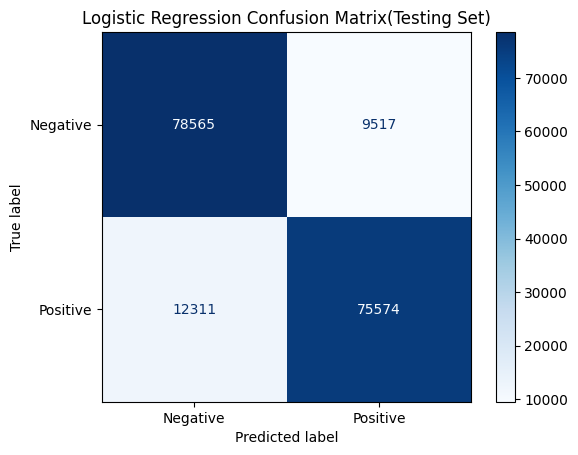

In [71]:
ConfusionMatrixDisplay.from_estimator(
    log_reg, X_test, y_test, display_labels=["Negative", "Positive"], cmap="Blues"
)
plt.title("Logistic Regression Confusion Matrix(Testing Set)")
plt.show()

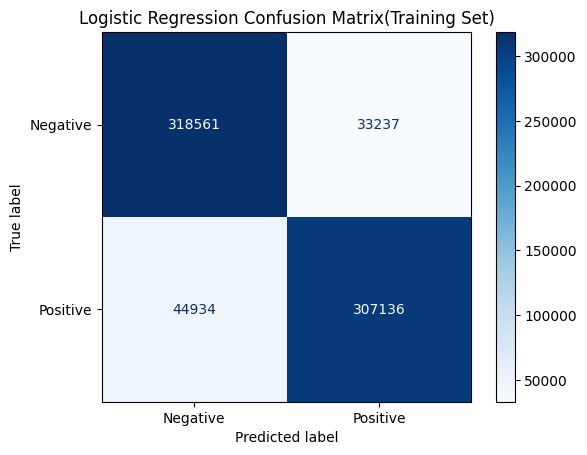

In [70]:
ConfusionMatrixDisplay.from_estimator(
    log_reg, X_train, y_train, display_labels=["Negative", "Positive"], cmap="Blues"
)
plt.title("Logistic Regression Confusion Matrix(Training Set)")
plt.show()